<a href="https://colab.research.google.com/github/SonicMetal15/uci-cs273a-project/blob/master/CS273P_HW04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 273P: Homework 4
    Keith Tachibana
    Student ID 69125572
    Spring 2019

# Problem 1.1: Calculate the entropy of the class variable y.

# Problem 1.2: Calculate the information gain for each feature xi.  Which feature should I split on first?

# Problem 1.3: Draw the complete decision tree that will be learned from these data.

# Problem 2.1: Print the minimum, maximum, mean, and the variance of all of the features.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.path.append('HW4-code/')
import mltools as ml

X = np.genfromtxt('HW4-data/data/X_train.txt', delimiter=None)
Y = np.genfromtxt('HW4-data/data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xmin = np.min(X, axis=0)
Xmax = np.max(X, axis=0)
Xmean = np.mean(X, axis=0)
Xstd = np.std(X, axis=0)

print("The minimum is:\n {},\n\n the maximum is:\n {},\n\n the mean is:\n {},\n\n and the variance is:\n {}\n"\
      .format(Xmin, Xmax, Xmean, Xstd))

ModuleNotFoundError: ignored

# Problem 2.2: Print the min, maximum, mean, and the variance of the rescaled features.

In [0]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000]
XtS, params = ml.rescale(Xt)
XvaS, _ = ml.rescale(Xva, params)

XtSMin = np.min(XtS, axis=0)
XtSMax = np.max(XtS, axis=0)
XtSMean = np.mean(XtS, axis=0)
XtSStd = np.std(XtS, axis=0)
XvaSMin = np.min(XvaS, axis=0)
XvaSMax = np.max(XvaS, axis=0)
XvaSMean = np.mean(XvaS, axis=0)
XvaSStd = np.std(XvaS, axis=0)

print("The minimum for rescaled training is:\n {},\n\n the maximum is:\n {},\n\n the mean is:\n {},\n\n and the\
 variance is:\n {}\n\n".format(XtSMin, XtSMax, XtSMean, XtSStd))
print("The minimum for rescaled validation is:\n {},\n\n the maximum is:\n {},\n\n the mean is:\n {},\n\n and\
 the variance is:\n {}\n".format(XvaSMin, XvaSMax, XvaSMean, XvaSStd))


The minimum for rescaled training is:
 [ -4.74097039  -3.98528375  -4.38054231  -2.87202105  -0.88268435
  -0.49750836  -0.20490832  -1.12840162  -1.86407164  -0.93030477
  -2.10456116  -1.98998694  -0.75081686 -25.96008161],

 the maximum is:
 [ 1.21498937  1.74955529  1.65479294  1.8458092   4.40826813  6.43717139
 10.7638041   9.87573956  4.21305482  4.55992014  6.84324698  5.42528614
 15.46498525 11.69397057],

 the mean is:
 [-1.33981715e-14  1.09516840e-15 -2.54898325e-14  4.58864724e-14
 -4.19664303e-18 -1.17905685e-16 -2.26818564e-17  1.76958448e-15
  3.44413387e-15 -1.58613123e-15  9.98889860e-16  2.07046602e-15
 -6.62336852e-16  4.74065232e-17],

 and the variance is:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


The minimum for rescaled validation is:
 [ -5.28242127  -3.98528375  -4.43515324  -2.87202105  -0.88268435
  -0.49750836  -0.20490832  -1.12840162  -2.19328647  -0.93030477
  -2.10456116  -1.98998694  -0.75608593 -25.96008161],

 the maximum is:
 [ 1.21498937  2.166

# Problem 3.1: Vary the amount of regularization, "reg", in a wide enough range, and plot the training and validation AUC as the regularization weight is varied.  Show the plot.

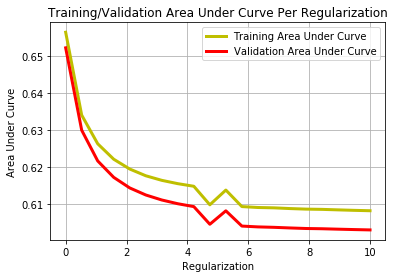

In [0]:
alpha1 = np.linspace(0, 10, 20)
trainHat1 = np.zeros(len(alpha1))
validHat1 = np.zeros(len(alpha1))

for i,a in enumerate (alpha1):
    learner1 = ml.linearC.linearClassify()
    learner1.train(XtS, Yt, reg=a, initStep=0.05, stopTol=1e-7, stopIter=250)
    trainHat1[i] = learner1.auc(XtS, Yt)
    validHat1[i] = learner1.auc(XvaS, Yva)
    
plt.plot(alpha1, trainHat1, 'y-', linewidth=3, markersize=8, label='Training Area Under Curve')
plt.plot(alpha1, validHat1, 'r-', linewidth=3, markersize=8, label='Validation Area Under Curve')
plt.xlabel('Regularization')
plt.ylabel('Area Under Curve')
plt.title('Training/Validation Area Under Curve Per Regularization')
plt.legend(loc='upper right')
plt.grid()
plt.show()    

# Problem 3.2: Add degree 2 polynomial features, print out the number of features, why it is what it is.

In [0]:
Xtr2feat = ml.transforms.fpoly(Xt, 2, bias=False)
Xtr2shape = Xtr2feat.shape
print("The number of features, with the addition of degree 2 polynomial features, is given by the 2nd term in {},\
 or 119, which is a result of adding the terms theta-15*x-15 and theta-16*x-16, each to their respective\
 powers, which contributes to the final sum of 119".format(Xtr2shape))

The number of features, with the addition of degree 2 polynomial features, is given by the 2nd term in (5000, 119), or 119, which is a result of adding the terms theta-15*x-15 and theta-16*x-16, each to their respective powers, which contributes to the final sum of 119


# Problem 3.3: Reuse your code that varied regularization to compute the training and validation performance (AUC) for this transformed data.  Show the plot.

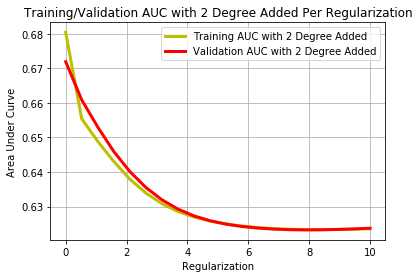

In [0]:
alpha2 = np.linspace(0, 10, 20)
trainHat2 = np.zeros(len(alpha2))
validHat2 = np.zeros(len(alpha2))

Xtr2ft = ml.transforms.fpoly(Xt, 2, bias=False)
Xtr2ftRe, params = ml.transforms.rescale(Xtr2ft)
Xva2ftRe, _ = ml.transforms.rescale(ml.transforms.fpoly(Xva, 2, bias=False), params)

for i,a in enumerate(alpha2):
    learner2 = ml.linearC.linearClassify()
    learner2.train(Xtr2ftRe, Yt, reg=a, initStep=0.05, stopTol=1e-7, stopIter=200)
    trainHat2[i] = learner2.auc(Xtr2ftRe, Yt)
    validHat2[i] = learner2.auc(Xva2ftRe, Yva)
    
plt.plot(alpha2, trainHat2, 'y-', linewidth=3, markersize=8, label='Training AUC with 2 Degree Added')
plt.plot(alpha2, validHat2, 'r-', linewidth=3, markersize=8, label='Validation AUC with 2 Degree Added')
plt.xlabel('Regularization')
plt.ylabel('Area Under Curve')
plt.title('Training/Validation AUC with 2 Degree Added Per Regularization')
plt.legend(loc='upper right')
plt.grid()
plt.show()    

# Problem 4.1: Plot of the training and validation performance for an approximately wide range of K, with alpha = 0.

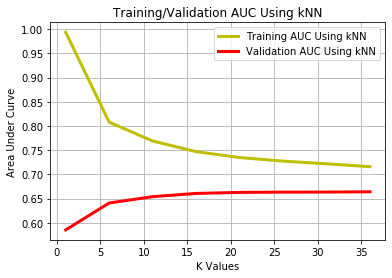

In [0]:
Kvalues1 = range(1, 40, 5)
trainHat3 = np.zeros(len(Kvalues1))
validHat3 = np.zeros(len(Kvalues1))

for i,a in enumerate(Kvalues1):
    learner3 = ml.knn.knnClassify()
    learner3.train(XtS, Yt, K=a, alpha=0)
    trainHat3[i] = learner3.auc(XtS, Yt)
    validHat3[i] = learner3.auc(XvaS, Yva)
    
plt.plot(Kvalues1, trainHat3, 'y-', linewidth=3, label='Scaled Training AUC Using kNN')
plt.plot(Kvalues1, validHat3, 'r-', linewidth=3, label='Scaled Validation AUC Using kNN')
plt.xlabel('K Values')
plt.ylabel('Area Under Curve')
plt.title('Scaled Training/Validation AUC Using kNN')
plt.legend(loc='upper right')
plt.grid()
plt.show() 

# Problem 4.2: Do the same with unscaled/original data, and show the plots.

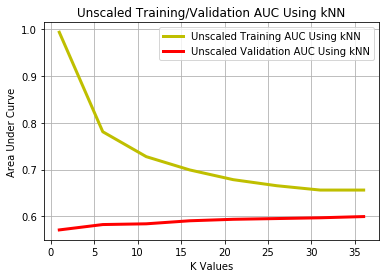

In [0]:
for i,a in enumerate(Kvalues):
    learner4 = ml.knn.knnClassify()
    learner4.train(Xt, Yt, K=a, alpha=0)
    trainHat3[i] = learner4.auc(Xt, Yt)
    validHat3[i] = learner4.auc(Xva, Yva)
    
plt.plot(Kvalues1, trainHat3, 'y-', linewidth=3, label='Unscaled Training AUC Using kNN')
plt.plot(Kvalues1, validHat3, 'r-', linewidth=3, label='Unscaled Validation AUC Using kNN')
plt.xlabel('K Values')
plt.ylabel('Area Under Curve')
plt.title('Unscaled Training/Validation AUC Using kNN')
plt.legend(loc='upper right')
plt.grid()
plt.show()    

# Problem 4.3: Show both the plots, and recommend a choice of K and alpha based on these results.

In [0]:
Kvalues2 = range(40, 101, 5)
alpha3 = np.linspace(0, 2, 9)
trainHat4 = np.zeros((len(Kvalues2), len(alpha3)))
validHat4 = np.zeros((len(Kvalues2), len(alpha3)))

for i,k in enumerate(Kvalues2):
    for j,a in enumerate(alpha3):
        learner5 = ml.knn.knnClassify()
        learner5.train(XtS, Yt, K=k, alpha=a)
        trainHat4[i][j] = learner5.auc(XtS, Yt)
        validHat4[i][j] = learner5.auc(XvaS, Yva)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(validHat4, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(alpha3)
ax.set_yticklabels(Kvalues2)
#ax.set_xticks(range(len(alpha3)), alpha3)
#ax.set_yticks(range(len(Kvalues2)), Kvalues2)
ax.set_xlabel('Alpha Values')
ax.set_ylabel('K Values')
ax.set_title('Validation AUC Using kNN')
ax.grid()
ax.show()
                     
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
cax = ax.matshow(trainHat4, interpolation='nearest')
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha3)
ax.set_yticklabels(['']+Kvalues2)
#ax.set_xticks(range(len(alpha3)), alpha3)
#ax.set_yticks(range(len(Kvalues2)), Kvalues2)
ax.set_xlabel('Alpha Values')
ax.set_ylabel('K Values')
ax.set_title('Training AUC Using kNN')
ax.grid()
ax.show()

NameError: ignored